In [29]:
import pandas as pd
import json

index = 0
jdict = {}
with open("dataset.json", "r", encoding="utf-8") as rf:
        while True:
            line = rf.readline()
            if not line:
                break
            raw = json.loads(line)
            jdict[index] = raw["headline"]
            index += 1

with open("web_scrape.txt", "r", encoding="utf-8") as rf:
    lines = rf.readlines()
    
for x in lines:
    jdict[index] = x
    index += 1
    
df = pd.DataFrame(jdict.items(), columns=["index", "text"])
df.to_csv("text.csv", sep='\t', encoding="utf-8", index=False)

In [2]:
from fastai.text import *
from fastai.metrics import *
from fastai.callbacks import *

data = TextLMDataBunch.from_csv("", "text.csv", delimiter='\t', text_cols="text", bs=50)
data.save("data_export.pkl")

In [3]:
data.show_batch()

idx,text
0,", xxmaj princess xxmaj xxunk of xxmaj arabia reportedly begged her father the sultan xxmaj friday to spare xxmaj john xxmaj kerry ’s life . “ xxmaj please , xxmaj father , i love him ! ” cried the xxunk youngest daughter of the monarch as she flung her arms around the former xxmaj massachusetts senator ’s neck and refused to let go . “ xxmaj he is a good"
1,"conversation is this : a couple of weeks earlier , on a xxmaj tesla - related trip to xxmaj germany , xxmaj musk gave an interview to a xxmaj german newspaper , xxmaj xxunk . xxmaj the resulting article was published a few days before we speak , and toward its end came the following exchange , which related to xxmaj apple 's rumored move into car design and manufacturing"
2,"benazir xxmaj bhutto , i admire her tenacity and leadership to rise to the top in a country where women have few rights . xxmaj what do you want xxmaj signarama - xxmaj plano to accomplish in the next xxunk goal is to double the revenue of xxmaj signarama - xxmaj plano in the next year while adding two new employees to the team . \n xxbos depraved candidate"
3,"for grabs , with 24 awarded by district and 18 going to the statewide winner . xxmaj even if xxmaj cruz wins by a small margin , he 'll automatically take all 18 state delegates and likely a good portion of district level delegates . xxmaj that would probably keep xxmaj trump below the level he needs to win a majority before the xxmaj republican convention . xxmaj of"
4,"n't real friends , according to xxmaj pope xxmaj francis . xxmaj in a speech to xxmaj american bishops on xxmaj sunday morning at xxmaj st. xxmaj charles xxmaj borromeo xxmaj seminary , xxmaj francis said there "" are no longer close personal relationships "" and that today 's culture "" seems to encourage people not to bond with anything or anyone , not to trust . "" xxmaj"


In [4]:
learn = language_model_learner(data, AWD_LSTM)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


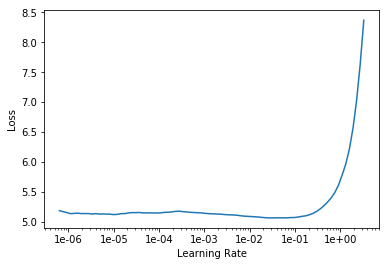

In [5]:
learn.lr_find()
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(5, 1e-2, callbacks=[SaveModelCallback(learn, monitor="accuracy", mode="max")])

epoch,train_loss,valid_loss,accuracy,time
0,4.631464,4.234838,0.285870,20:07
1,4.733675,4.294957,0.281981,20:10
2,4.624036,4.217311,0.287929,20:11
3,4.494357,4.124358,0.297087,20:13
4,4.363595,4.096083,0.299740,20:13


Better model found at epoch 0 with accuracy value: 0.2858702540397644.
Better model found at epoch 2 with accuracy value: 0.2879285216331482.
Better model found at epoch 3 with accuracy value: 0.2970869839191437.
Better model found at epoch 4 with accuracy value: 0.2997395098209381.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


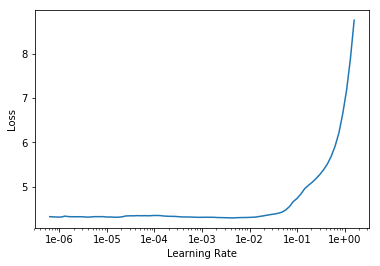

In [14]:
learn.save("learn-stage1")
learn.save_encoder("learn-stage1-enc")
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(5, 1e-3, callbacks=[SaveModelCallback(learn, monitor="accuracy", mode="max")])

epoch,train_loss,valid_loss,accuracy,time
0,4.091564,3.949857,0.316728,22:58
1,4.087332,3.905288,0.324736,23:01
2,3.962336,3.851673,0.331140,23:00
3,3.863927,3.810065,0.335959,22:58
4,3.787004,3.798714,0.337240,22:59


Better model found at epoch 0 with accuracy value: 0.3167283236980438.
Better model found at epoch 1 with accuracy value: 0.3247358500957489.
Better model found at epoch 2 with accuracy value: 0.33113959431648254.
Better model found at epoch 3 with accuracy value: 0.33595937490463257.
Better model found at epoch 4 with accuracy value: 0.33724039793014526.


In [16]:
learn.save("learn-stage2")
learn.save_encoder("learn-stage2-enc")

In [8]:
for x in range(3):
    print(learn.predict("The United States has promised to", n_words=30))

The United States has promised to skip immigration reform but as of Tuesday it is expected to strengthen it because Congress would have implemented a procedure that would 32 percent of sarah .
The United States has promised to ban all American refugees from entering the U.S. 
  xxbos waters for president us 's hiding walls ( gas in bed four times a day ) xxbos a
The United States has promised to find housing in available urban areas , like only children , who would use the resources they ’ve experienced through childhood programs , school districts and the American divisive
